In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
print(G.is_directed())

H = nx.DiGraph()
print(H.is_directed())

G.graph['Name'] = 'Bar'
G.graph['Sex'] = 'Male'
print(G.graph)

False
True
{'Name': 'Bar', 'Sex': 'Male'}


In [3]:
G.add_node(0, feature=0, label=0)

node_0_attr = G.nodes[0]
print(node_0_attr)

{'feature': 0, 'label': 0}


In [4]:
G.add_nodes_from([
    (1, {'feature': 1, 'label' : 1}),
    (2, {'feature': 2, 'label' : 2})
])
print(G.nodes)
for node in G.nodes(data=True):
    print(node)
    
num_nodes = G.number_of_nodes()
print(f'G has {num_nodes} nodes')

[0, 1, 2]
(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


In [5]:
G.add_edge(0, 1, weight=0.5, relationship='family')

edge_0_1_attr = G.edges[(0,1)]
print(f'Edge (0,1) has attributes {edge_0_1_attr}')

Edge (0,1) has attributes {'weight': 0.5, 'relationship': 'family'}


In [6]:
G.add_edges_from([
    (1,2, {'weight' : 0.3, 'relationship' : 'friend'}),
    (2,0, {'weight' : 0.1})
])

for edge in G.edges(data=True):
    print(edge)
    
num_edges = G.number_of_edges()
print(f'G has {num_edges} edges')

(0, 1, {'weight': 0.5, 'relationship': 'family'})
(0, 2, {'weight': 0.1})
(1, 2, {'weight': 0.3, 'relationship': 'friend'})
G has 3 edges


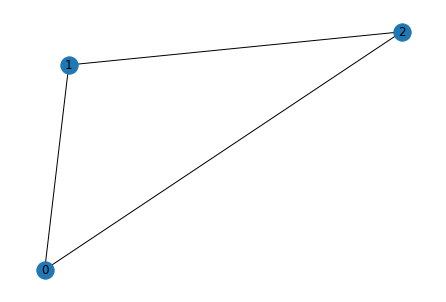

In [7]:
nx.draw(G, with_labels=True)

In [8]:
node_id = 1

print(f'Node {node_id} has degree {G.degree[node_id]}')

for neighbor in G.neighbors(node_id):
    print(f'Node {node_id} has neighbor {neighbor}')

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


In [9]:
for i in G.nodes:
    print(f'Node {i} has degree of {G.degree[i]}, and has neighbor of {list(G.neighbors(i))}')

Node 0 has degree of 2, and has neighbor of [1, 2]
Node 1 has degree of 2, and has neighbor of [0, 2]
Node 2 has degree of 2, and has neighbor of [1, 0]


{0: 0.13777752404485466,
 1: 0.24444495191029075,
 2: 0.23555504808970928,
 3: 0.24444495191029075,
 4: 0.13777752404485466}

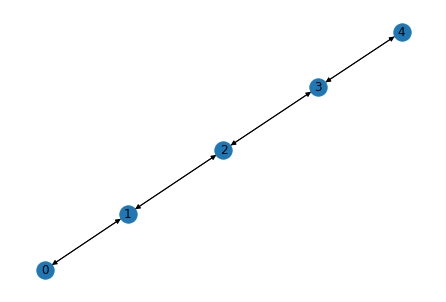

In [10]:
num_nodes = 5

G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels=True)

pr = nx.pagerank(G, alpha=0.8)
pr

In [11]:
import torch
torch.__version__

'1.7.1+cu110'

In [12]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [13]:
from torch_geometric.datasets import KarateClub

# social network of 34 members of a karate club and documents links between members who interacted outside the club
# interested in detecting communities that arise from the member's interaction

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [14]:
data = dataset[0]

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(edge_index=[2, 156], train_mask=[34], x=[34, 34], y=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [15]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

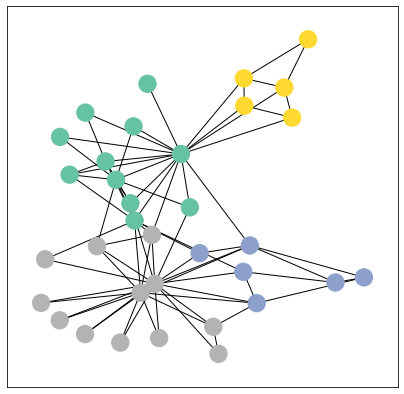

In [16]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

In [17]:
data.y

tensor([0, 0, 0, 0, 2, 2, 2, 0, 3, 3, 2, 0, 0, 0, 3, 3, 2, 0, 3, 0, 3, 0, 3, 1,
        1, 1, 3, 1, 1, 3, 3, 1, 3, 3])

In [18]:
# node : 확진자
# edge : 접촉 관계
# node_features : 사람의 특징(연령, 성별...)
# edge_features : 접촉 시 상황(접촉 장소의 특징, 접촉 시 주변 사람의 수, 몇 차 감염...)

In [19]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4,4)
        self.conv3 = GCNConv(4,2)
        #nn.linear 입력 dim, 출력 dim 인수로 넣어줌
        self.classifier = Linear(2, dataset.num_classes)
        
    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()
        
        out = self.classifier(h)
        
        return out, h
    
model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


[34, 2]


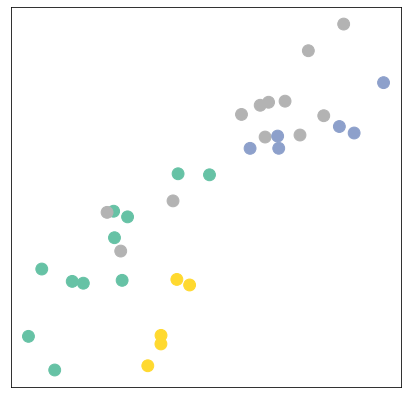

In [20]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(list(h.shape))

visualize(h, color=data.y)

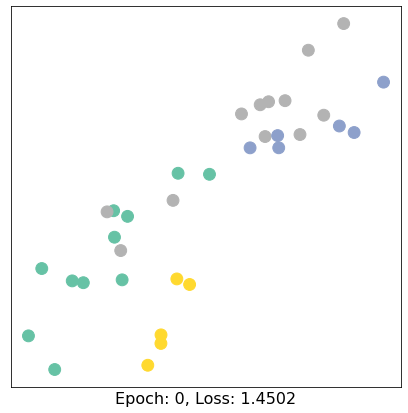

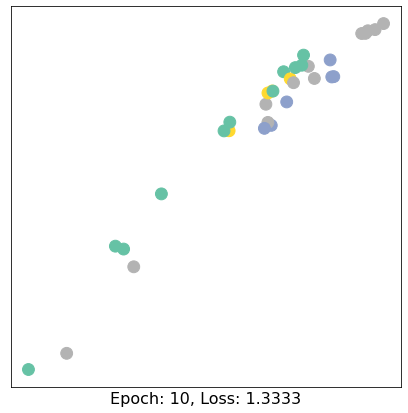

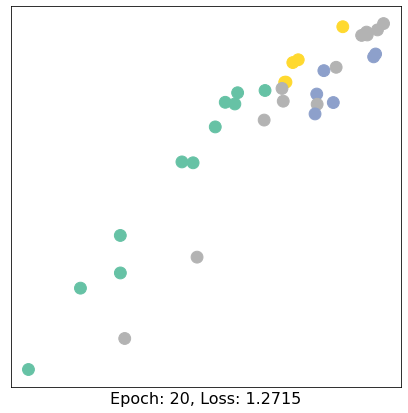

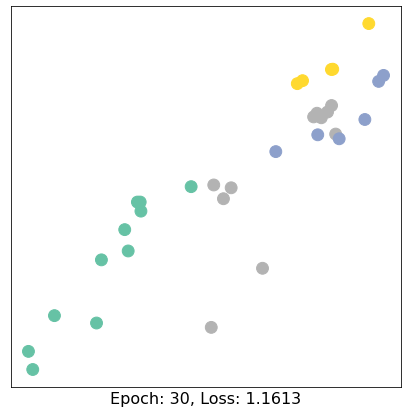

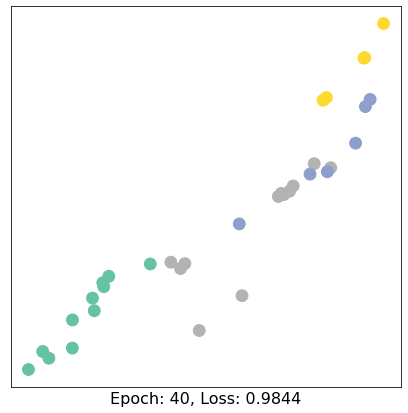

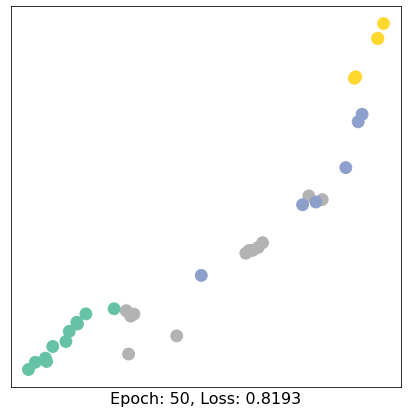

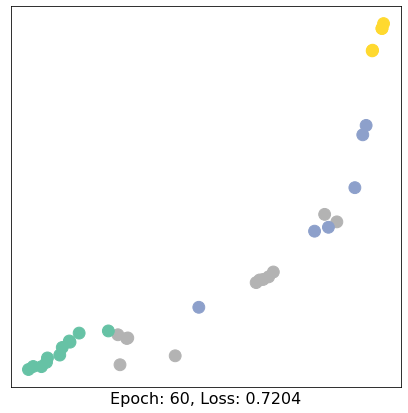

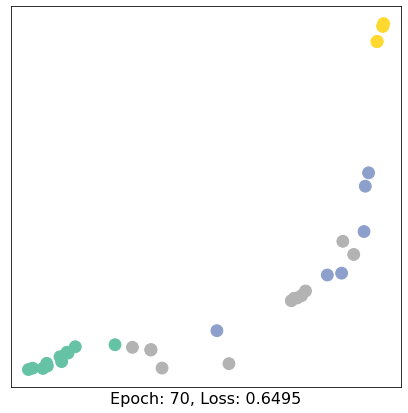

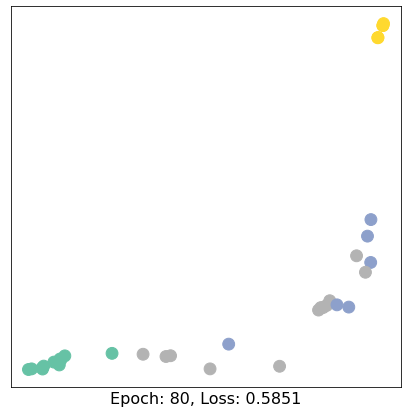

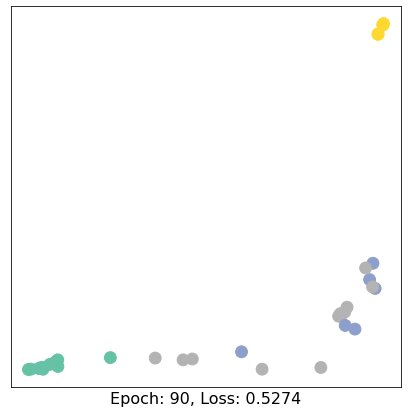

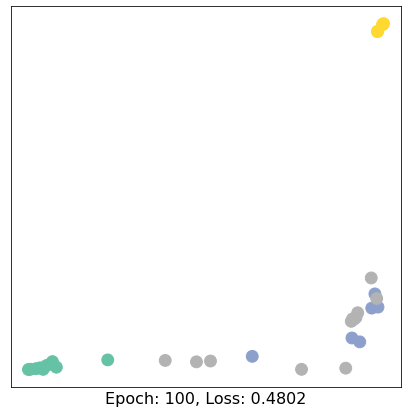

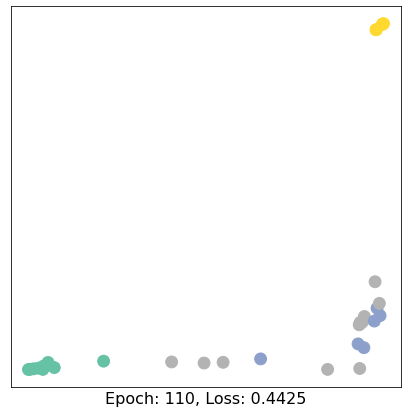

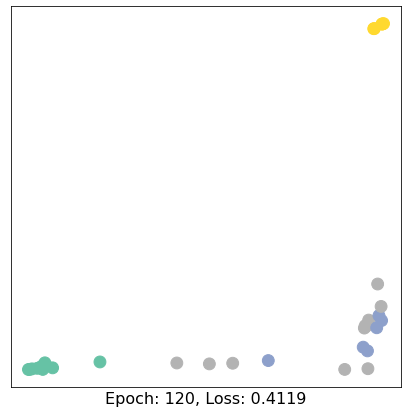

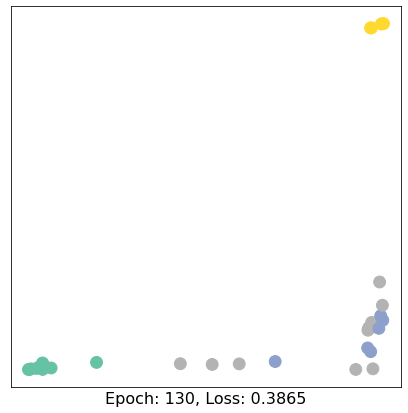

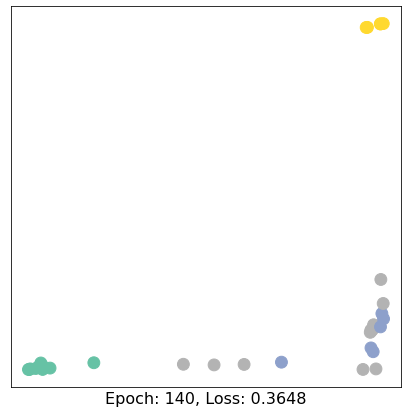

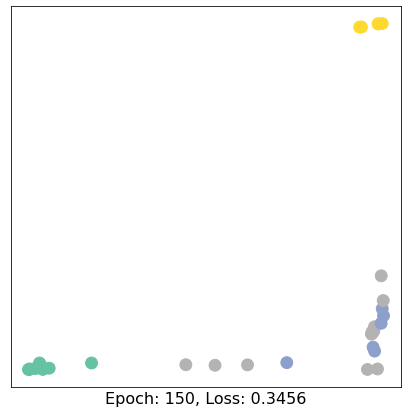

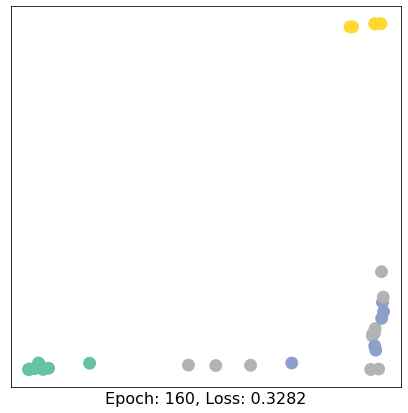

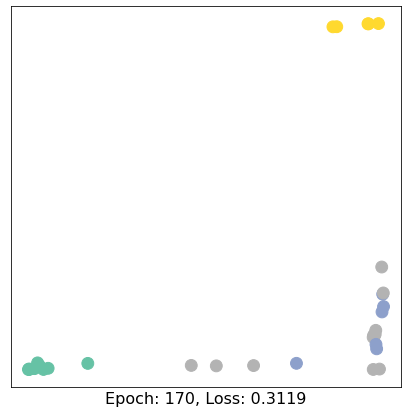

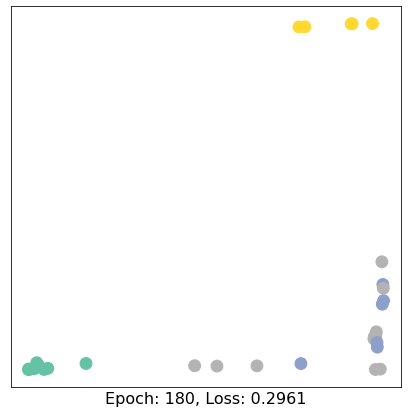

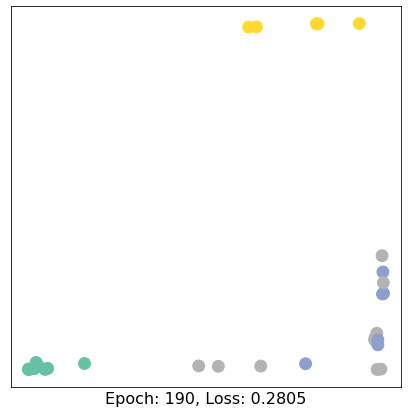

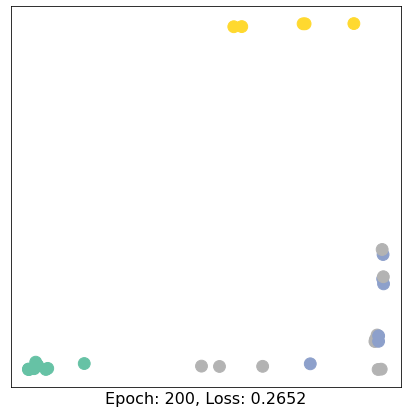

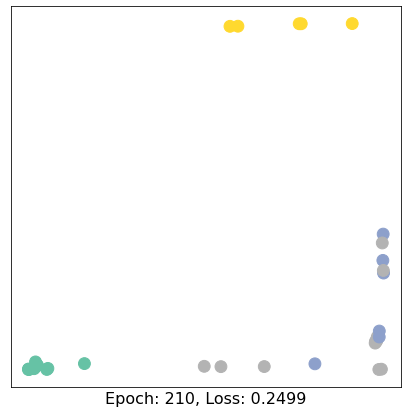

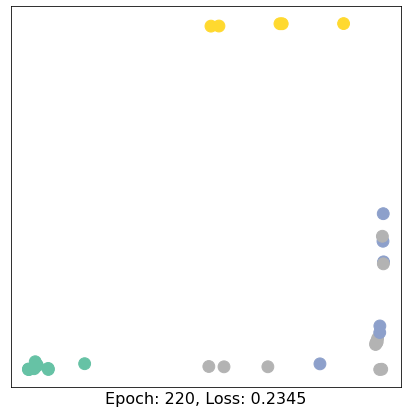

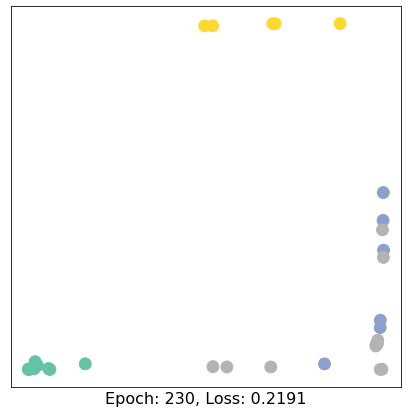

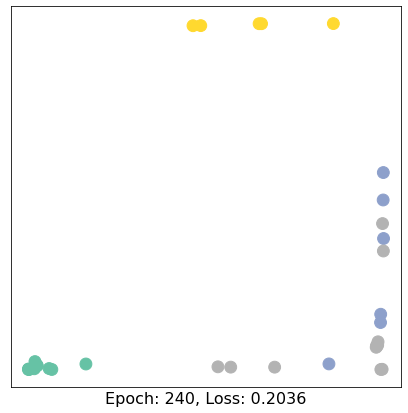

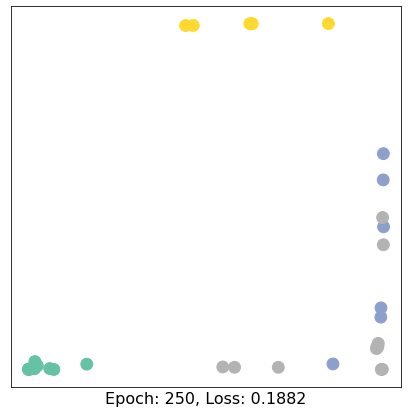

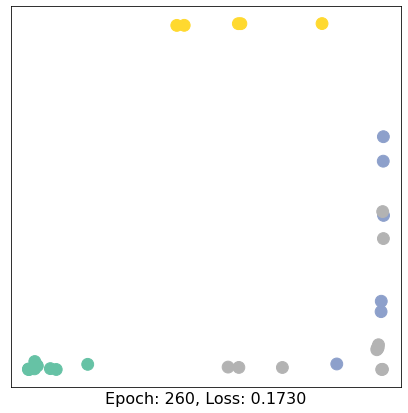

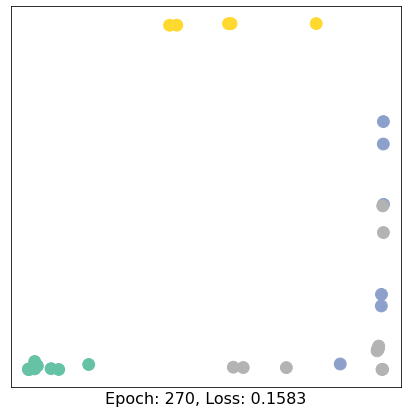

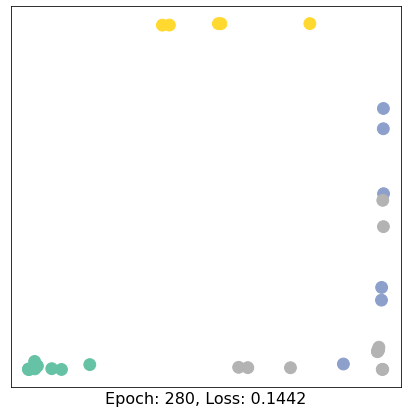

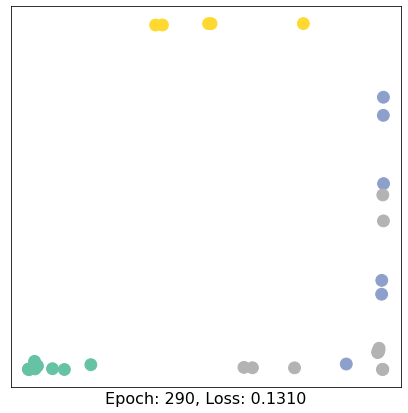

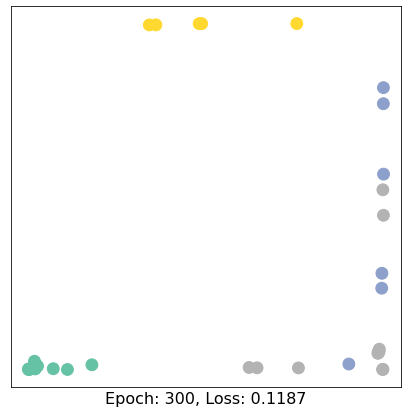

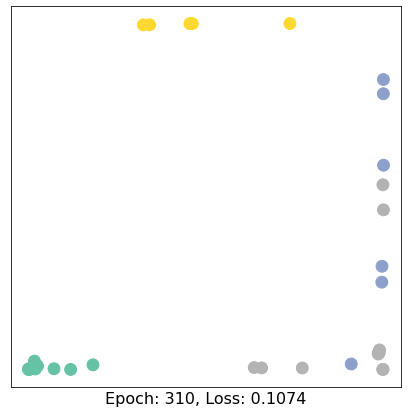

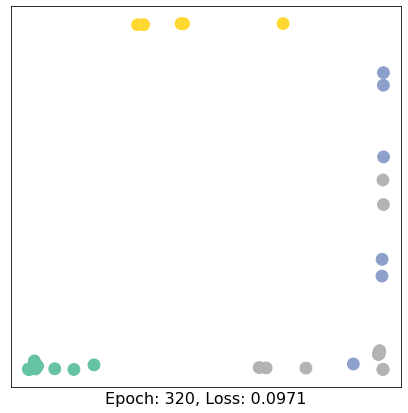

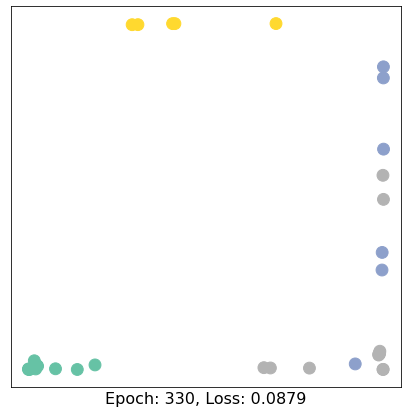

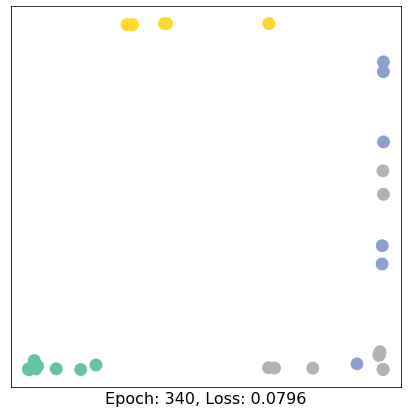

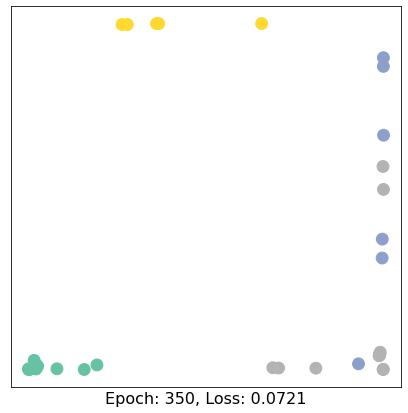

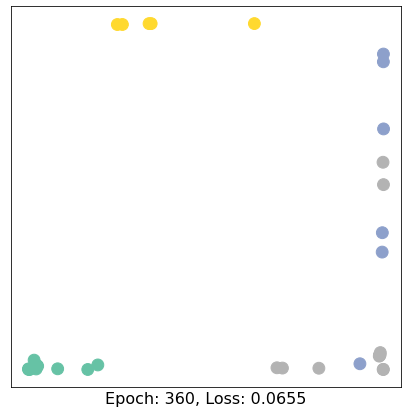

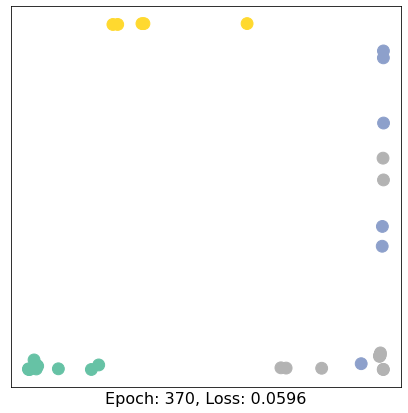

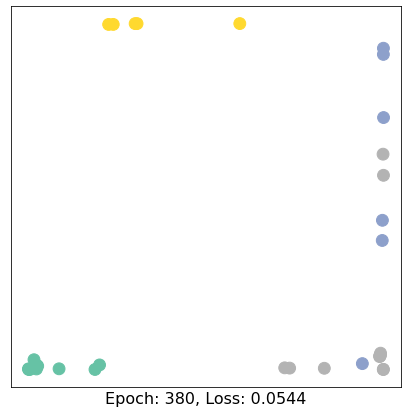

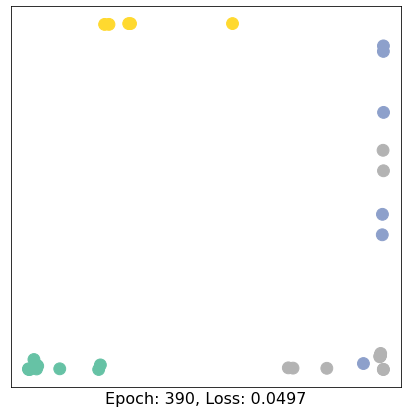

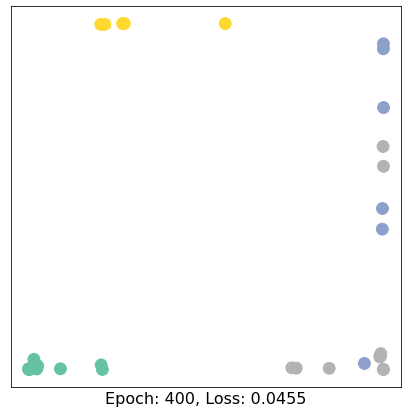

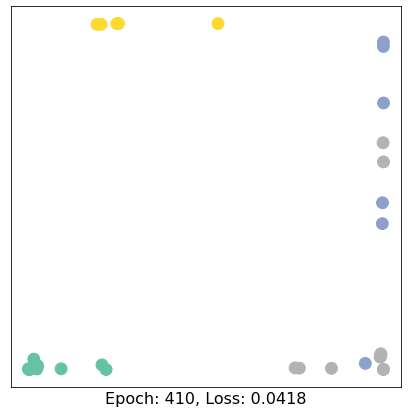

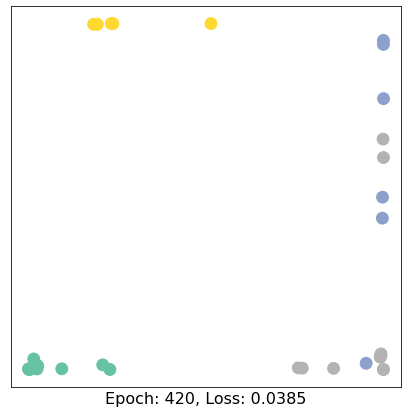

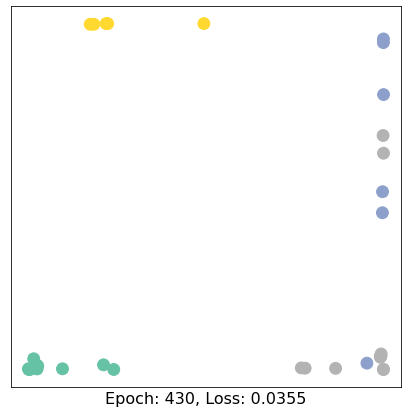

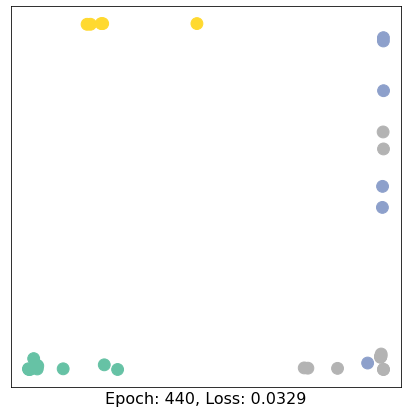

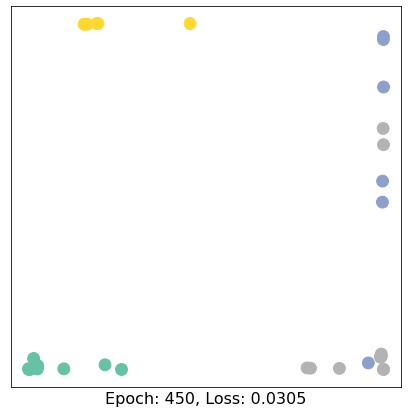

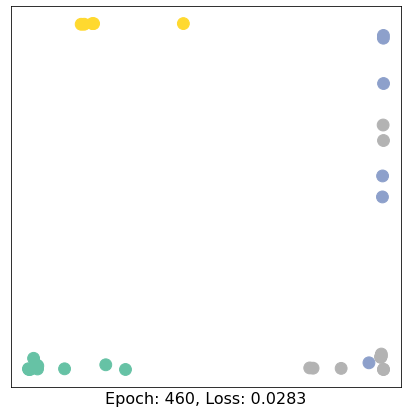

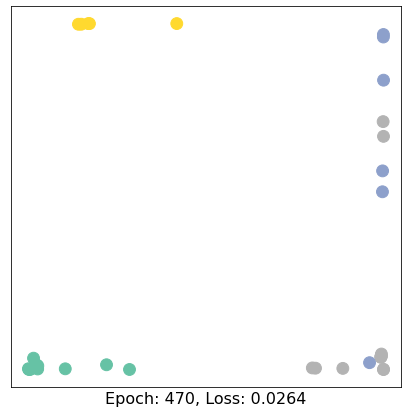

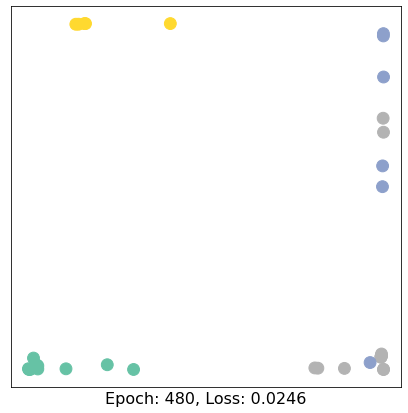

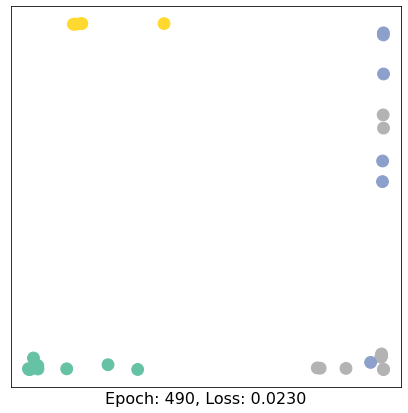

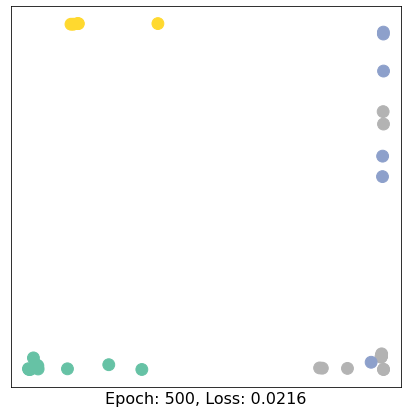

In [21]:
import time

model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(data):
    optimizer.zero_grad()
    out, h = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss, h

for epoch in range(510):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

In [22]:
data.y

tensor([0, 0, 0, 0, 2, 2, 2, 0, 3, 3, 2, 0, 0, 0, 3, 3, 2, 0, 3, 0, 3, 0, 3, 1,
        1, 1, 3, 1, 1, 3, 3, 1, 3, 3])

In [23]:
data.train_mask

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False])